# 🔍 Grid Search Analysis

**Hyperparameter tuning visualization for distillation experiments**

This notebook analyzes grid search results from knowledge distillation experiments to identify optimal hyperparameter combinations.

## Analysis Features
- Parses grid search log files
- Identifies top-performing configurations
- Creates heatmaps showing parameter interactions
- Helps optimize distillation parameters (α, β, KL weight, temperature)

In [ ]:
## 📦 Import Libraries and Setup
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Configure plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Folder where grid logs are stored
LOG_DIR = "./grid_logs/distillation_grid_logs"
  
# Regex to parse filenames (e.g., loss_alpha0.3_beta0.5_kl0.1_temp2.0.txt)
FILENAME_RE = re.compile(r"loss_alpha(?P<alpha>.*?)_beta(?P<beta>.*?)_kl(?P<kl>.*?)_temp(?P<temp>.*?)\.txt")

def parse_log_file(filepath):
    """Extract final loss value from training log file"""
    with open(filepath, "r") as f:
        lines = f.readlines()
        if not lines:
            return None  # Empty file
        # Extract last epoch loss
        last_line = lines[-1]
        match = re.search(r"Loss: ([0-9\.]+)", last_line)
        if match:
            return float(match.group(1))
    return None

def collect_results():
    """Collect all grid search results from log files"""
    records = []
    for filename in os.listdir(LOG_DIR):
        match = FILENAME_RE.match(filename)
        if match:
            params = match.groupdict()
            alpha = float(params["alpha"])
            beta = float(params["beta"])
            kl = float(params["kl"])
            temp = float(params["temp"])

            filepath = os.path.join(LOG_DIR, filename)
            final_loss = parse_log_file(filepath)

            if final_loss is not None:
                records.append({
                    "alpha": alpha,
                    "beta": beta,
                    "kl": kl,
                    "temp": temp,
                    "final_loss": final_loss
                })

    df = pd.DataFrame(records)
    return df

def print_top_configs(df, top_n=10):
    """Display top N best configurations"""
    print("\n" + "="*60)
    print(f"🏆 Top {top_n} Best Configurations")
    print("="*60)
    top_df = df.sort_values("final_loss").head(top_n)
    print(top_df.to_string(index=False))
    print("="*60)

def plot_heatmap(df, param_x, param_y, fixed_params={}):
    """
    Create heatmap showing relationship between two parameters
    
    Args:
        param_x: Parameter for x-axis ('alpha', 'beta', 'kl', 'temp')
        param_y: Parameter for y-axis ('alpha', 'beta', 'kl', 'temp')
        fixed_params: Dict to fix other parameters (e.g., {'beta': 0.5})
    """
    filtered_df = df.copy()
    for k, v in fixed_params.items():
        filtered_df = filtered_df[filtered_df[k] == v]

    if filtered_df.empty:
        print(f"⚠️ No data found for fixed params: {fixed_params}")
        return

    pivot_table = filtered_df.pivot_table(
        index=param_y, columns=param_x, values="final_loss", aggfunc="mean"
    )

    plt.figure(figsize=(10, 8))
    plt.title(f"Final Loss Heatmap: {param_y} vs {param_x}\nFixed: {fixed_params}", 
              fontsize=14, fontweight='bold')
    sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="viridis", 
                cbar_kws={'label': 'Final Loss'})
    plt.xlabel(param_x.upper(), fontsize=12)
    plt.ylabel(param_y.upper(), fontsize=12)
    plt.tight_layout()
    plt.show()

print("✅ Grid search analysis functions loaded!")

In [ ]:
## 📊 Load Grid Search Results
df = collect_results()
print(f"✅ Loaded {len(df)} experiment configurations")
print(f"\nDataset shape: {df.shape}")
print(f"\nParameter ranges:")
for col in ['alpha', 'beta', 'kl', 'temp']:
    print(f"  {col}: {df[col].min():.2f} to {df[col].max():.2f}")

FileNotFoundError: [Errno 2] No such file or directory: './grid_logs/distillation_grid_logs'

In [ ]:
## 🏆 Show Top Configurations
print_top_configs(df, top_n=15)


=== Top configs ===

    alpha  beta    kl  temp  final_loss
53    0.3   0.3  0.05   5.0  275.393543
16    0.3   0.3  0.20   2.0  275.521022
67    0.3   0.3  0.10   2.0  275.964102
52    0.3   0.3  0.10   3.0  276.028576
18    0.3   0.3  0.05   2.0  276.196571
30    0.3   0.3  0.05   3.0  276.485131
26    0.3   0.3  0.20   5.0  277.637945
28    0.3   0.3  0.20   3.0  279.606585
69    0.3   0.3  0.10   5.0  280.778665
80    0.3   0.5  0.05   3.0  292.192827


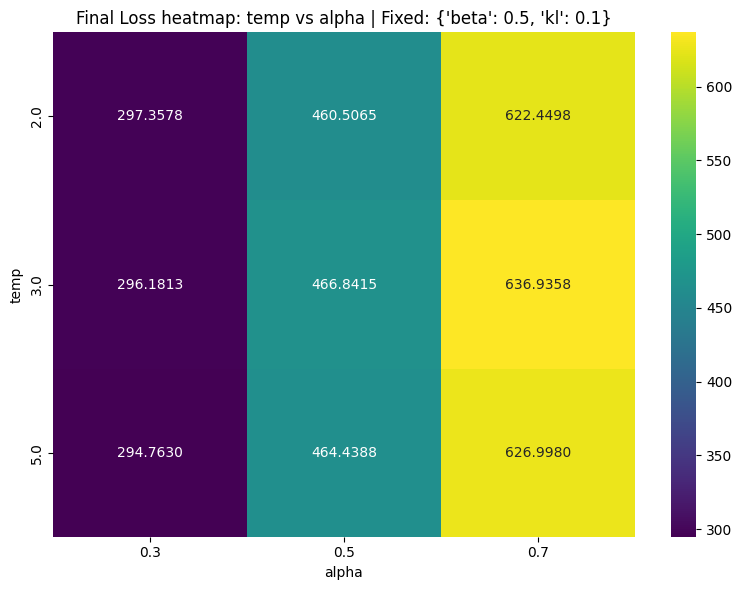

In [ ]:
## 📈 Visualize Parameter Interactions

# Heatmap 1: Alpha vs Temperature (fix beta=0.5, kl=0.1)
plot_heatmap(df, param_x="alpha", param_y="temp", fixed_params={"beta": 0.5, "kl": 0.1})

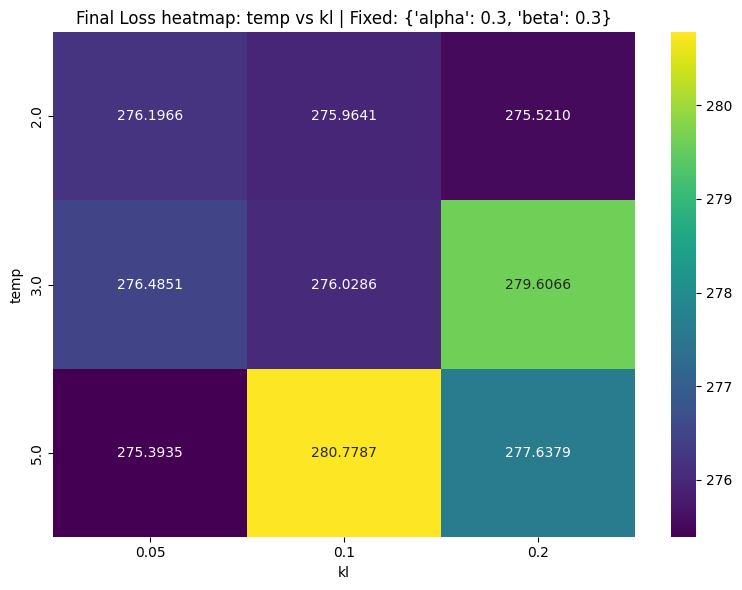

In [ ]:
# Heatmap 2: Beta vs KL weight (fix alpha=0.3, temp=2.0)
plot_heatmap(df, param_x="beta", param_y="kl", fixed_params={"alpha": 0.3, "temp": 2.0})